In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical

In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [4]:
feature_vector_length = 784 
num_classes = 10 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length) 
X_test = X_test.reshape(X_test.shape[0], feature_vector_length) 
X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255 
Y_train = to_categorical(Y_train, num_classes) 
Y_test = to_categorical(Y_test, num_classes) 

In [6]:
model = Sequential() 
model.add(Dense(350, input_shape=input_shape, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(num_classes, activation='softmax')) 

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(X_train, Y_train, epochs=5, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/5
192/192 [==============================] - 5s 20ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0937 - val_accuracy: 0.9758
Epoch 2/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0965 - val_accuracy: 0.9763
Epoch 3/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.0886 - val_accuracy: 0.9773
Epoch 4/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0076 - accuracy: 0.9980 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 5/5
192/192 [==============================] - 4s 19ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0931 - val_accuracy: 0.9778


In [14]:
test_results = model.evaluate(X_test, Y_test, verbose=1) 
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}') 

313/313 [==============================] - 2s 4ms/step - loss: 0.0799 - accuracy: 0.9797
Test results - Loss: 0.07994036376476288 - Accuracy: 0.9797000288963318


In [11]:
predictions = model.predict(X_test[:10]) 
predicted_classes = np.argmax(predictions, axis=1) 
true_classes = np.argmax(Y_test[:10], axis=1)

1/1 [==============================] - 0s 61ms/step


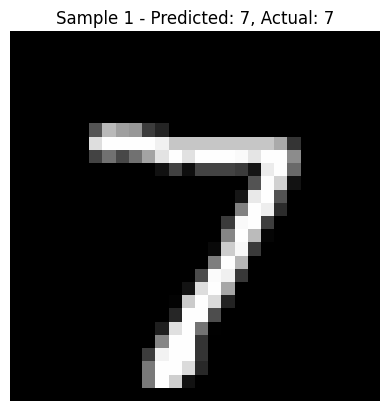

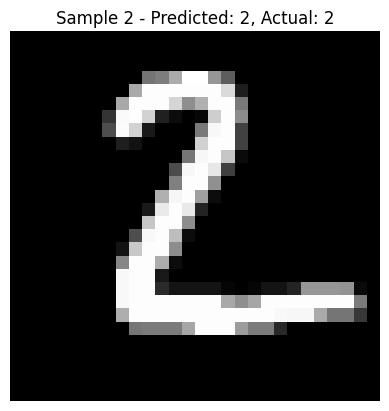

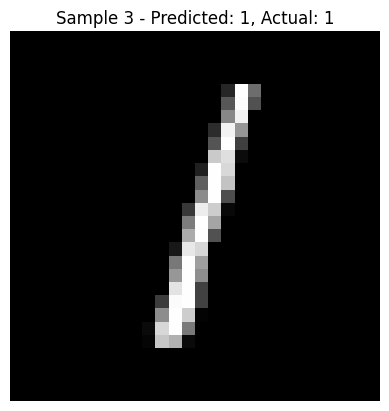

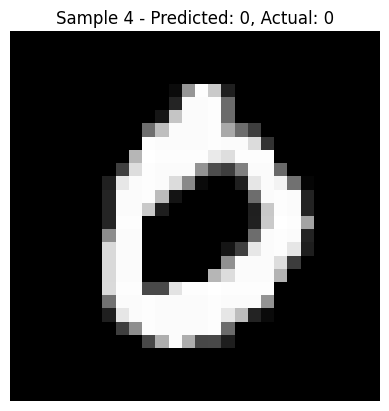

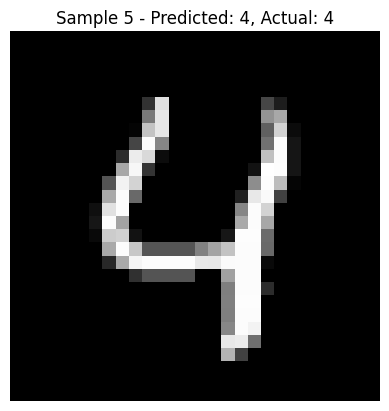

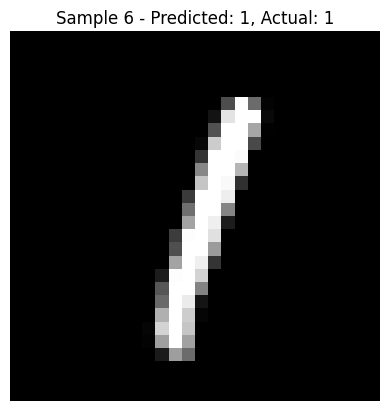

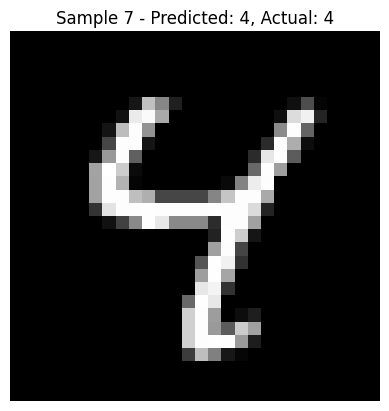

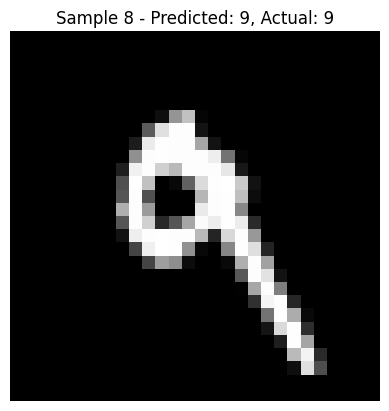

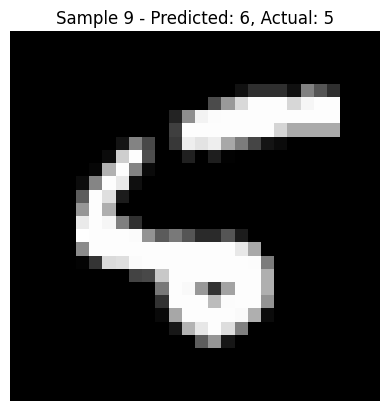

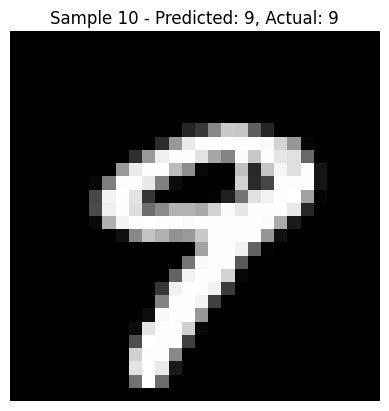

In [12]:
for i in range(10): 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}") 
    plt.axis('off') 
    plt.show()